WinPercentage
Team ID: ATL, Year: 9, Win Percentage: 11.76%
Team ID: ATL, Year: 10, Win Percentage: 52.94%
Team ID: CHA, Year: 1, Win Percentage: 25.00%
Team ID: CHA, Year: 2, Win Percentage: 56.25%
Team ID: CHA, Year: 3, Win Percentage: 56.25%
Team ID: CHA, Year: 4, Win Percentage: 52.94%
Team ID: CHA, Year: 5, Win Percentage: 47.06%
Team ID: CHA, Year: 6, Win Percentage: 17.65%
Team ID: CHA, Year: 7, Win Percentage: 32.35%
Team ID: CHI, Year: 7, Win Percentage: 14.71%
Team ID: CHI, Year: 8, Win Percentage: 41.18%
Team ID: CHI, Year: 9, Win Percentage: 35.29%
Team ID: CHI, Year: 10, Win Percentage: 47.06%
Team ID: CLE, Year: 1, Win Percentage: 53.12%
Team ID: CLE, Year: 2, Win Percentage: 68.75%
Team ID: CLE, Year: 3, Win Percentage: 31.25%
Team ID: CLE, Year: 4, Win Percentage: 50.00%
Team ID: CON, Year: 4, Win Percentage: 52.94%
Team ID: CON, Year: 5, Win Percentage: 52.94%
Team ID: CON, Year: 6, Win Percentage: 76.47%
Team ID: CON, Year: 7, Win Percentage: 76.47%
Team ID: CON, Year

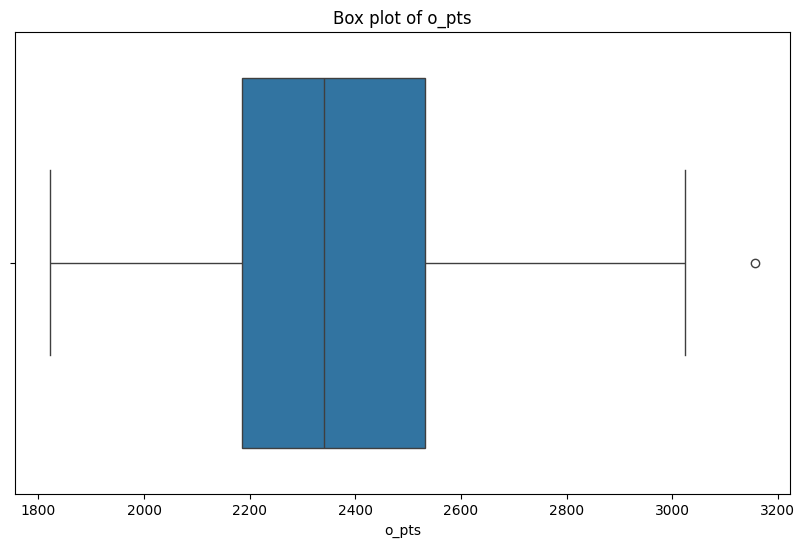

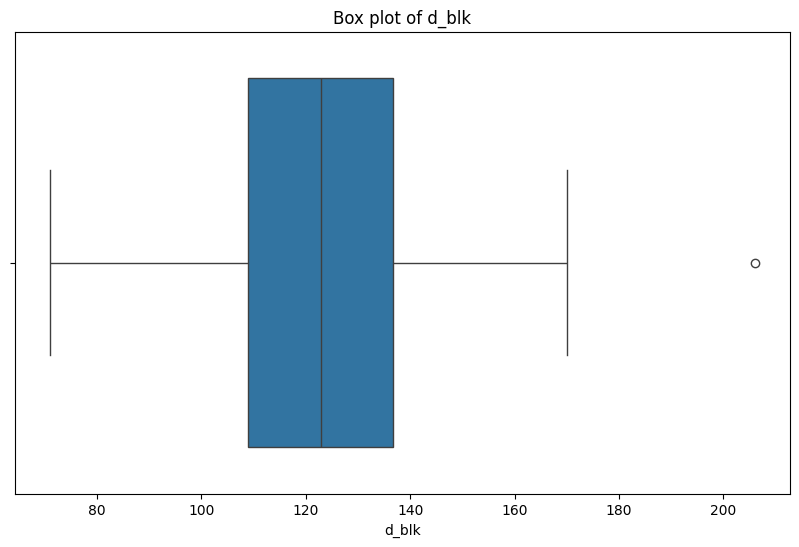

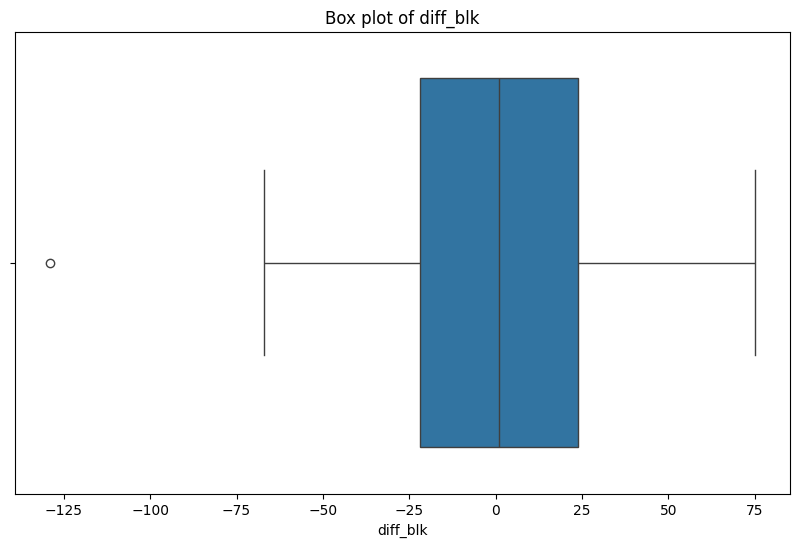

mean_diff_reb      0.363968
mean_diff_awayW    0.353762
mean_diff_dreb     0.343081
mean_diff_won      0.338469
diff_reb           0.337612
                     ...   
diff_tmDRB              NaN
diff_tmTRB              NaN
mean_diff_tmORB         NaN
mean_diff_tmDRB         NaN
mean_diff_tmTRB         NaN
Name: next_year_playoff, Length: 96, dtype: float64
Correlation With WinPercentage
0.2959574446046357
Best Accuracy: 0.78 with K-Nearest Neighbors using top 25 features
Selected features: ['won' 'lost' 'awayW' 'awayL' 'confW' 'confL' 'W' 'L' 'diff_dreb'
 'diff_reb' 'diff_asts' 'diff_pts' 'diff_won' 'diff_awayW' 'diff_confW'
 'mean_diff_fgm' 'mean_diff_dreb' 'mean_diff_reb' 'mean_diff_asts'
 'mean_diff_pts' 'mean_diff_won' 'mean_diff_homeW' 'mean_diff_awayW'
 'mean_diff_confW' 'winPercentage']
WinPercentage
Team ID: ATL, Year: 9, Win Percentage: 11.76%
Team ID: ATL, Year: 10, Win Percentage: 52.94%
Team ID: CHA, Year: 1, Win Percentage: 25.00%
Team ID: CHA, Year: 2, Win Percentage: 56

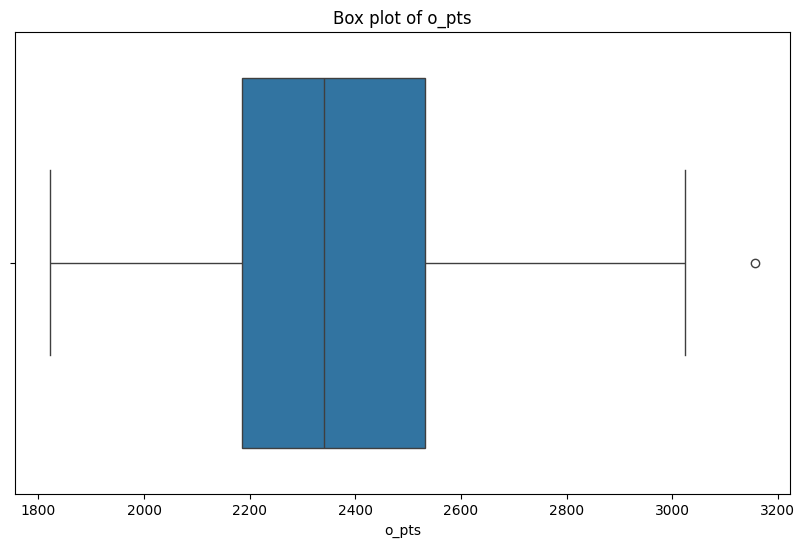

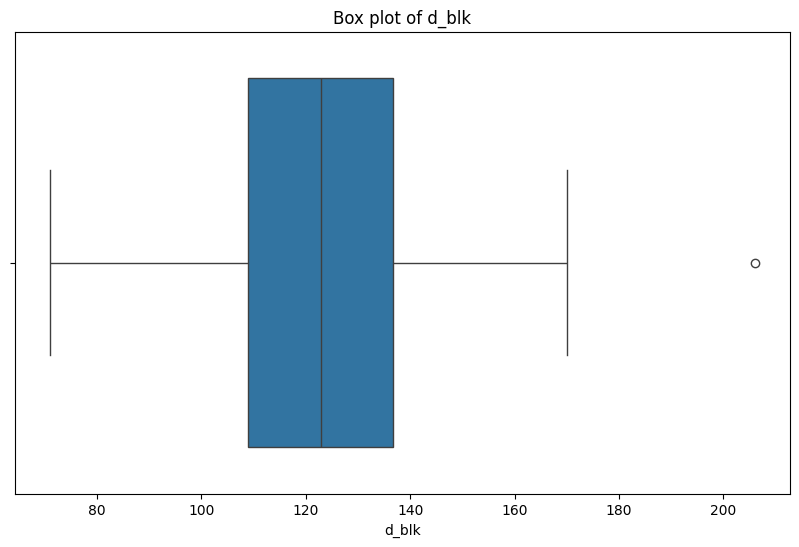

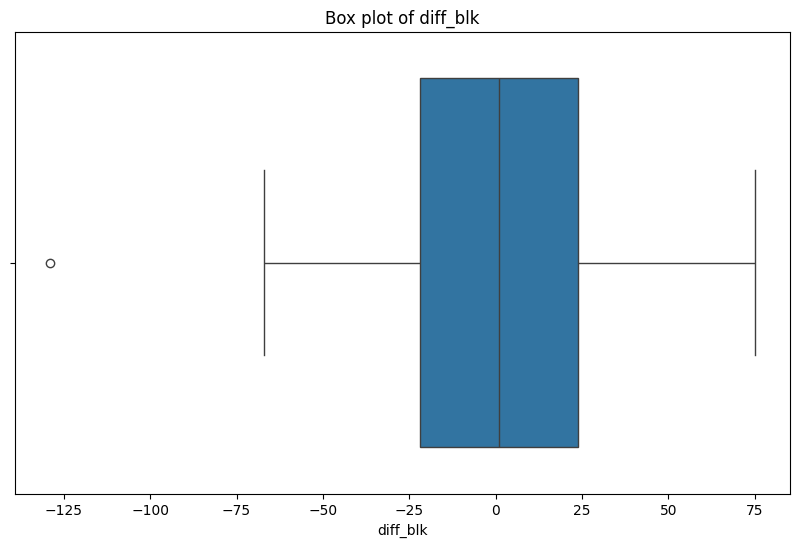

Features Correlation with Next Year Playoff (Ordered by Correlation Value)
mean_diff_reb      0.363968
mean_diff_awayW    0.353762
mean_diff_dreb     0.343081
mean_diff_won      0.338469
diff_reb           0.337612
                     ...   
diff_tmDRB              NaN
diff_tmTRB              NaN
mean_diff_tmORB         NaN
mean_diff_tmDRB         NaN
mean_diff_tmTRB         NaN
Name: next_year_playoff, Length: 96, dtype: float64


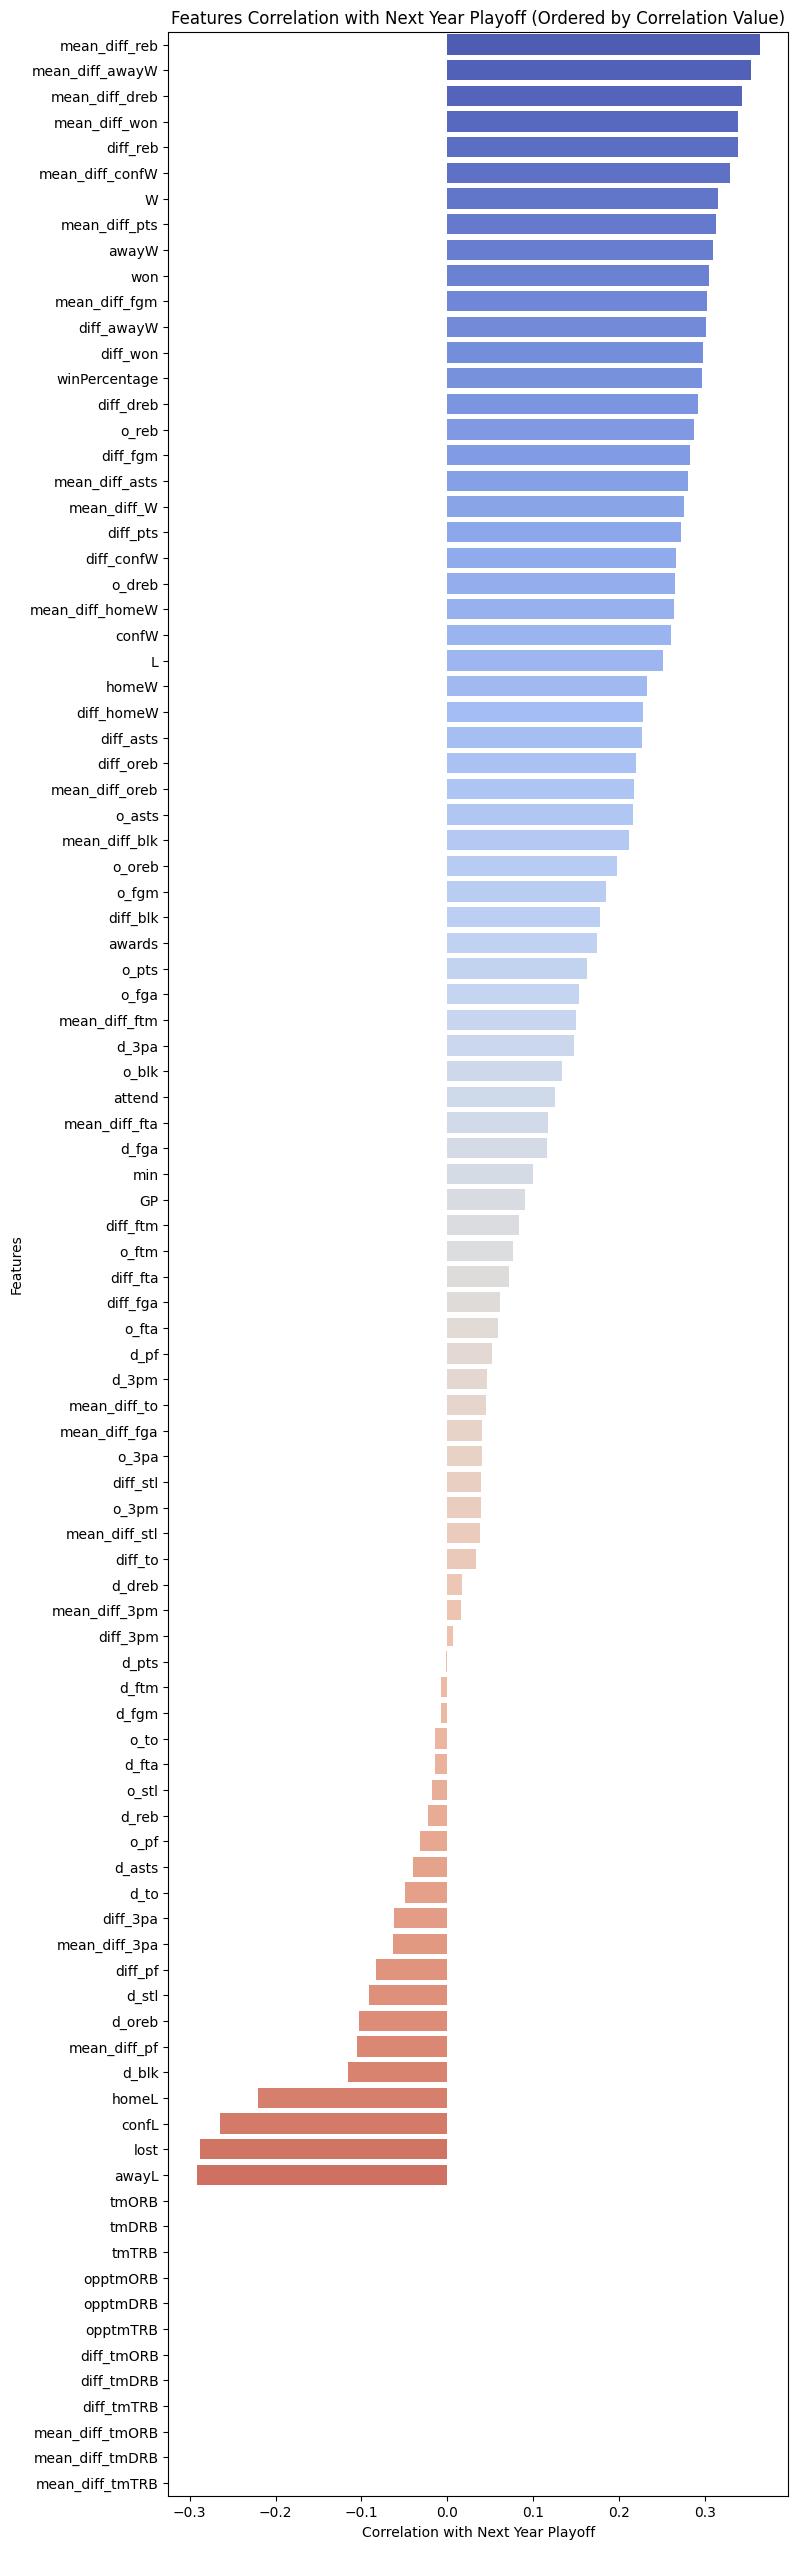

Correlation With WinPercentage
0.2959574446046357
Logistic Regression Accuracy with top 3 features: 0.62
Logistic Regression Accuracy with top 4 features: 0.54
Logistic Regression Accuracy with top 5 features: 0.46
Logistic Regression Accuracy with top 6 features: 0.46
Logistic Regression Accuracy with top 7 features: 0.54
Logistic Regression Accuracy with top 8 features: 0.54
Logistic Regression Accuracy with top 9 features: 0.54
Logistic Regression Accuracy with top 10 features: 0.54
Logistic Regression Accuracy with top 11 features: 0.46
Logistic Regression Accuracy with top 12 features: 0.38
Logistic Regression Accuracy with top 13 features: 0.46
Logistic Regression Accuracy with top 14 features: 0.46
Logistic Regression Accuracy with top 15 features: 0.38
Logistic Regression Accuracy with top 16 features: 0.38
Logistic Regression Accuracy with top 17 features: 0.31
Logistic Regression Accuracy with top 18 features: 0.31
Logistic Regression Accuracy with top 19 features: 0.38
Logis

In [2]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.feature_selection import SelectKBest, f_classif



warnings.filterwarnings("ignore")





# Load all CSV files
awards_players = pd.read_csv("basketballPlayoffs/awards_players.csv")
coaches = pd.read_csv("basketballPlayoffs/coaches.csv")
players = pd.read_csv("basketballPlayoffs/players.csv")
players_teams = pd.read_csv("basketballPlayoffs/players_teams.csv")
series_post = pd.read_csv("basketballPlayoffs/series_post.csv")
teams = pd.read_csv("basketballPlayoffs/teams.csv")
teams_post = pd.read_csv("basketballPlayoffs/teams_post.csv")


# merge awards_players, players, players_teams and coaches on 
# players_awards and coaches_awards


players_awards = pd.merge(players_teams, awards_players, on=['playerID', 'year'], how='left')
players_awards = pd.merge(players_awards, players, left_on='playerID', right_on='bioID', how='left')
players_awards = players_awards.drop(columns=['bioID'])

# Convert birthDate to datetime
players_awards['birthDate'] = pd.to_datetime(players_awards['birthDate'])

# Calculate age
current_date = datetime.now()
players_awards['age'] = players_awards['birthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Drop the birthDate column if no longer needed
players_awards.drop(columns=['birthDate'], inplace=True)


coaches_awards = pd.merge(coaches, awards_players, left_on=['coachID', 'year'], right_on=['playerID', 'year'], how='left')
coaches_awards = coaches_awards.drop(columns=['playerID'])





players_awards.to_csv('novos/players_awards.csv', index=False)
coaches_awards.to_csv('novos/coaches_awards.csv', index=False)





# Merge the two DataFrames on "year" and "tmID"
teams = pd.merge(teams, teams_post[['year', 'tmID', 'W', 'L']], on=['year', 'tmID'], how='left')

# Fill missing "W" and "L" values with 0
teams['W'] = teams['W'].fillna(0)
teams['L'] = teams['L'].fillna(0)


teams.to_csv('novos/teams.csv', index=False)


# return team with tmID and year
def get_team(tmID, year):
    return teams[(teams['tmID'] == tmID) & (teams['year'] == year)]


# make a script that for each team (year, tmID) search if the players of that team had any awards in the same year, if so add a column to the team dataframe with the number of awards
def add_awards_to_teams():
    teams['awards'] = 0
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        team_players = players_awards[(players_awards['tmID'] == tmID) & (players_awards['year'] == year)]
        awards = team_players['award'].count()
        teams.loc[index, 'awards'] = awards

        coaches_team = coaches_awards[(coaches_awards['tmID'] == tmID) & (coaches_awards['year'] == year)]
        awards = coaches_team['award'].count()
        teams.loc[index, 'awards'] += awards

        #if (coaches_team['award'] == 'Coach of the Year').any():
            #teams.loc[index, 'awards'] += 50


    teams.to_csv('novos/teams.csv', index=False)


add_awards_to_teams()



# Convert "playoff" feature to numeric (assuming "Y" for yes and "N" for no)
teams['playoff'] = teams['playoff'].apply(lambda x: 1 if x == 'Y' else 0)








teams['diff_fgm'] = teams['o_fgm'] - teams['d_fgm']
teams['diff_fga'] = teams['o_fga'] - teams['d_fga']

teams['diff_ftm'] = teams['o_ftm'] - teams['d_ftm']
teams['diff_fta'] = teams['o_fta'] - teams['d_fta']

teams['diff_3pm'] = teams['o_3pm'] - teams['d_3pm']
teams['diff_3pa'] = teams['o_3pa'] - teams['d_3pa']

teams['diff_oreb'] = teams['o_oreb'] - teams['d_oreb']
teams['diff_dreb'] = teams['o_dreb'] - teams['d_dreb']

teams['diff_reb'] = teams['o_reb'] - teams['d_reb']
teams['diff_asts'] = teams['o_asts'] - teams['d_asts']

teams['diff_pf'] = teams['o_pf'] - teams['d_pf']
teams['diff_stl'] = teams['o_stl'] - teams['d_stl']

teams['diff_to'] = teams['o_to'] - teams['d_to']
teams['diff_blk'] = teams['o_blk'] - teams['d_blk']

teams['diff_pts'] = teams['o_pts'] - teams['d_pts']
teams['diff_tmORB'] = teams['tmORB'] - teams['opptmORB']

teams['diff_tmDRB'] = teams['tmDRB'] - teams['opptmDRB']
teams['diff_tmTRB'] = teams['tmTRB'] - teams['opptmTRB']

teams['diff_won'] = teams['won'] - teams['lost']


teams['diff_homeW'] = teams['homeW'] - teams['homeL']
teams['diff_awayW'] = teams['awayW'] - teams['awayL']

teams['diff_confW'] = teams['confW'] - teams['confL']
teams['diff_W'] = teams['W'] - teams['L']


yearly_stats = {}

for year, year_data in teams.groupby('year'):
  
    year_dict = {}

    for index, row in year_data.iterrows():
        # offensive stats
        offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

        # Update max and min for each stat per year
        year_dict.setdefault('offensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFieldGoalPercentage']['max'] = max(year_dict['offensiveFieldGoalPercentage']['max'], offensiveFieldGoalPercentage)
        year_dict['offensiveFieldGoalPercentage']['min'] = min(year_dict['offensiveFieldGoalPercentage']['min'], offensiveFieldGoalPercentage)

        offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

        year_dict.setdefault('offensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFreeThrowPercentage']['max'] = max(year_dict['offensiveFreeThrowPercentage']['max'], offensiveFreeThrowPercentage)
        year_dict['offensiveFreeThrowPercentage']['min'] = min(year_dict['offensiveFreeThrowPercentage']['min'], offensiveFreeThrowPercentage)


        offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

        year_dict.setdefault('offensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveThreePointPercentage']['max'] = max(year_dict['offensiveThreePointPercentage']['max'], offensiveThreePointPercentage)
        year_dict['offensiveThreePointPercentage']['min'] = min(year_dict['offensiveThreePointPercentage']['min'], offensiveThreePointPercentage)


        offensiveReboundsPerGame = row['o_reb'] / row['GP']

        year_dict.setdefault('offensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveReboundsPerGame']['max'] = max(year_dict['offensiveReboundsPerGame']['max'], offensiveReboundsPerGame)
        year_dict['offensiveReboundsPerGame']['min'] = min(year_dict['offensiveReboundsPerGame']['min'], offensiveReboundsPerGame)


        offensiveAssistsPerGame = row['o_asts'] / row['GP']

        year_dict.setdefault('offensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveAssistsPerGame']['max'] = max(year_dict['offensiveAssistsPerGame']['max'], offensiveAssistsPerGame)
        year_dict['offensiveAssistsPerGame']['min'] = min(year_dict['offensiveAssistsPerGame']['min'], offensiveAssistsPerGame)

        offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

        year_dict.setdefault('offensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePersonalFoulsPerGame']['max'] = max(year_dict['offensivePersonalFoulsPerGame']['max'], offensivePersonalFoulsPerGame)
        year_dict['offensivePersonalFoulsPerGame']['min'] = min(year_dict['offensivePersonalFoulsPerGame']['min'], offensivePersonalFoulsPerGame)

        offensiveStealsPerGame = row['o_stl'] / row['GP']

        year_dict.setdefault('offensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveStealsPerGame']['max'] = max(year_dict['offensiveStealsPerGame']['max'], offensiveStealsPerGame)
        year_dict['offensiveStealsPerGame']['min'] = min(year_dict['offensiveStealsPerGame']['min'], offensiveStealsPerGame)

        offensiveTurnoversPerGame = row['o_to'] / row['GP']

        year_dict.setdefault('offensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveTurnoversPerGame']['max'] = max(year_dict['offensiveTurnoversPerGame']['max'], offensiveTurnoversPerGame)
        year_dict['offensiveTurnoversPerGame']['min'] = min(year_dict['offensiveTurnoversPerGame']['min'], offensiveTurnoversPerGame)

        offensiveBlocksPerGame = row['o_blk'] / row['GP']

        year_dict.setdefault('offensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveBlocksPerGame']['max'] = max(year_dict['offensiveBlocksPerGame']['max'], offensiveBlocksPerGame)
        year_dict['offensiveBlocksPerGame']['min'] = min(year_dict['offensiveBlocksPerGame']['min'], offensiveBlocksPerGame)

        offensivePointsPerGame = row['o_pts'] / row['GP']

        year_dict.setdefault('offensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePointsPerGame']['max'] = max(year_dict['offensivePointsPerGame']['max'], offensivePointsPerGame)
        year_dict['offensivePointsPerGame']['min'] = min(year_dict['offensivePointsPerGame']['min'], offensivePointsPerGame)

        # defensive stats
        defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

        year_dict.setdefault('defensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFieldGoalPercentage']['max'] = max(year_dict['defensiveFieldGoalPercentage']['max'], defensiveFieldGoalPercentage)
        year_dict['defensiveFieldGoalPercentage']['min'] = min(year_dict['defensiveFieldGoalPercentage']['min'], defensiveFieldGoalPercentage)

        defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

        year_dict.setdefault('defensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFreeThrowPercentage']['max'] = max(year_dict['defensiveFreeThrowPercentage']['max'], defensiveFreeThrowPercentage)
        year_dict['defensiveFreeThrowPercentage']['min'] = min(year_dict['defensiveFreeThrowPercentage']['min'], defensiveFreeThrowPercentage)

        defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

        year_dict.setdefault('defensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveThreePointPercentage']['max'] = max(year_dict['defensiveThreePointPercentage']['max'], defensiveThreePointPercentage)
        year_dict['defensiveThreePointPercentage']['min'] = min(year_dict['defensiveThreePointPercentage']['min'], defensiveThreePointPercentage)

        defensiveReboundsPerGame = row['d_reb'] / row['GP']

        year_dict.setdefault('defensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveReboundsPerGame']['max'] = max(year_dict['defensiveReboundsPerGame']['max'], defensiveReboundsPerGame)
        year_dict['defensiveReboundsPerGame']['min'] = min(year_dict['defensiveReboundsPerGame']['min'], defensiveReboundsPerGame)

        defensiveAssistsPerGame = row['d_asts'] / row['GP']

        year_dict.setdefault('defensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveAssistsPerGame']['max'] = max(year_dict['defensiveAssistsPerGame']['max'], defensiveAssistsPerGame)
        year_dict['defensiveAssistsPerGame']['min'] = min(year_dict['defensiveAssistsPerGame']['min'], defensiveAssistsPerGame)

        defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

        year_dict.setdefault('defensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePersonalFoulsPerGame']['max'] = max(year_dict['defensivePersonalFoulsPerGame']['max'], defensivePersonalFoulsPerGame)
        year_dict['defensivePersonalFoulsPerGame']['min'] = min(year_dict['defensivePersonalFoulsPerGame']['min'], defensivePersonalFoulsPerGame)

        defensiveStealsPerGame = row['d_stl'] / row['GP']

        year_dict.setdefault('defensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveStealsPerGame']['max'] = max(year_dict['defensiveStealsPerGame']['max'], defensiveStealsPerGame)
        year_dict['defensiveStealsPerGame']['min'] = min(year_dict['defensiveStealsPerGame']['min'], defensiveStealsPerGame)

        defensiveTurnoversPerGame = row['d_to'] / row['GP']

        year_dict.setdefault('defensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveTurnoversPerGame']['max'] = max(year_dict['defensiveTurnoversPerGame']['max'], defensiveTurnoversPerGame)
        year_dict['defensiveTurnoversPerGame']['min'] = min(year_dict['defensiveTurnoversPerGame']['min'], defensiveTurnoversPerGame)

        defensiveBlocksPerGame = row['d_blk'] / row['GP']

        year_dict.setdefault('defensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveBlocksPerGame']['max'] = max(year_dict['defensiveBlocksPerGame']['max'], defensiveBlocksPerGame)
        year_dict['defensiveBlocksPerGame']['min'] = min(year_dict['defensiveBlocksPerGame']['min'], defensiveBlocksPerGame)

        defensivePointsPerGame = row['d_pts'] / row['GP']

        year_dict.setdefault('defensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePointsPerGame']['max'] = max(year_dict['defensivePointsPerGame']['max'], defensivePointsPerGame)
        year_dict['defensivePointsPerGame']['min'] = min(year_dict['defensivePointsPerGame']['min'], defensivePointsPerGame)

        winPercentage = row['won'] / row['GP'] * 100

        year_dict.setdefault('winPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['winPercentage']['max'] = max(year_dict['winPercentage']['max'], winPercentage)
        year_dict['winPercentage']['min'] = min(year_dict['winPercentage']['min'], winPercentage)

        homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

        year_dict.setdefault('homeWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['homeWinPercentage']['max'] = max(year_dict['homeWinPercentage']['max'], homeWinPercentage)
        year_dict['homeWinPercentage']['min'] = min(year_dict['homeWinPercentage']['min'], homeWinPercentage)

        awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

        year_dict.setdefault('awayWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['awayWinPercentage']['max'] = max(year_dict['awayWinPercentage']['max'], awayWinPercentage)
        year_dict['awayWinPercentage']['min'] = min(year_dict['awayWinPercentage']['min'], awayWinPercentage)

        conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

        year_dict.setdefault('conferenceWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['conferenceWinPercentage']['max'] = max(year_dict['conferenceWinPercentage']['max'], conferenceWinPercentage)
        year_dict['conferenceWinPercentage']['min'] = min(year_dict['conferenceWinPercentage']['min'], conferenceWinPercentage)

        attendance = row['attend']

        year_dict.setdefault('attendance', {'max': -float('inf'), 'min': float('inf')})
        year_dict['attendance']['max'] = max(year_dict['attendance']['max'], attendance)
        year_dict['attendance']['min'] = min(year_dict['attendance']['min'], attendance)

        rank = row['rank']

        year_dict.setdefault('rank', {'max': -float('inf'), 'min': float('inf')})
        year_dict['rank']['max'] = max(year_dict['rank']['max'], rank)
        year_dict['rank']['min'] = min(year_dict['rank']['min'], rank)

        o_oreb = row['o_oreb']

        year_dict.setdefault('o_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_oreb']['max'] = max(year_dict['o_oreb']['max'], o_oreb)
        year_dict['o_oreb']['min'] = min(year_dict['o_oreb']['min'], o_oreb)

        o_dreb = row['o_dreb']

        year_dict.setdefault('o_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_dreb']['max'] = max(year_dict['o_dreb']['max'], o_dreb)
        year_dict['o_dreb']['min'] = min(year_dict['o_dreb']['min'], o_dreb)

        d_oreb = row['d_oreb']

        year_dict.setdefault('d_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_oreb']['max'] = max(year_dict['d_oreb']['max'], d_oreb)
        year_dict['d_oreb']['min'] = min(year_dict['d_oreb']['min'], d_oreb)

        d_dreb = row['d_dreb']

        year_dict.setdefault('d_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_dreb']['max'] = max(year_dict['d_dreb']['max'], d_dreb)
        year_dict['d_dreb']['min'] = min(year_dict['d_dreb']['min'], d_dreb)

    yearly_stats[year] = year_dict






teams['winPercentage'] = teams['won'] / teams['GP'] * 100




print("WinPercentage")

for index, row in teams.iterrows():

    year = row['year']
    teams['winPercentage'] = teams['won'] / teams['GP'] * 100
    teams['winPercentage'] = (teams['winPercentage'] - yearly_stats[year]['winPercentage']['min']) / (
        yearly_stats[year]['winPercentage']['max'] - yearly_stats[year]['winPercentage']['min']) * 100






    print(f"Team ID: {row['tmID']}, Year: {row['year']}, Win Percentage: {row['winPercentage']:.2f}%")





# create new columns with mean of diff features from the current and the previsous year
def add_mean_diff_features(years=2):
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        diffs = {feature: [] for feature in ['diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts', 'diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW', 'diff_W']}
        
        for i in range(0, years):
            previous_year = year - i
            previous_team = get_team(tmID, previous_year)
            if not previous_team.empty:
                for feature in diffs.keys():
                    diffs[feature].append(previous_team[feature].values[0])
        
        for feature, values in diffs.items():
            if values:
                teams.loc[index, f'mean_{feature}'] = (team[feature] + sum(values)) / (len(values) + 1)
            else:
                teams.loc[index, f'mean_{feature}'] = team[feature]

# Example usage:
add_mean_diff_features(years=2)

# newly created features in a list
new_features = ['mean_diff_fgm', 'mean_diff_fga', 'mean_diff_ftm', 'mean_diff_fta', 'mean_diff_3pm', 'mean_diff_3pa', 'mean_diff_oreb', 'mean_diff_dreb', 'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pf', 'mean_diff_stl', 'mean_diff_to', 'mean_diff_blk', 'mean_diff_pts', 'mean_diff_tmORB', 'mean_diff_tmDRB', 'mean_diff_tmTRB', 'mean_diff_won', 'mean_diff_homeW', 'mean_diff_awayW', 'mean_diff_confW', 'mean_diff_W']







# check correlation between features and playoff
features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L", "awards",'diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts','diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW']
features.extend(new_features)
features.extend(['winPercentage'])


original_features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L"]

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, features, threshold=3):
    outliers = {}
    for feature in features:
        mean = np.mean(df[feature])
        std_dev = np.std(df[feature])
        z_scores = (df[feature] - mean) / std_dev
        outliers[feature] = df[np.abs(z_scores) > threshold]
    return outliers

# Detect outliers
outliers = detect_outliers_zscore(teams, original_features)

# Print outliers for each feature
for feature, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers detected in feature '{feature}':")
        print(outlier_df[[feature]])
        print("\n")



# Plot box plots for the features with detected outliers
features_with_outliers = ['o_pts', 'd_blk', 'diff_blk']

for feature in features_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=teams[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()







# Ensure the dataset is ordered by tmID and year
teams = teams.sort_values(by=['tmID', 'year'])


# Create a new column for next year's playoff status
teams['next_year_playoff'] = teams.groupby('tmID')['playoff'].shift(-1)

teams.to_csv('novos/teams.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = teams[features + ['next_year_playoff']].corr()

# Extract the correlation of each feature with 'next_year_playoff'
correlation_with_target = correlation_matrix['next_year_playoff'].drop('next_year_playoff')

# Print the correlations
# ordered by the correlation value
correlation_with_target = correlation_with_target.sort_values(ascending=False)
print(correlation_with_target)

print("Correlation With WinPercentage")
print(correlation_with_target['winPercentage'])


# print to a csv for year 1 what teams made the playoffs in year 2
def print_playoffs(year):
    year_1_df = teams[teams['year'] == year]
    playoff_teams = year_1_df
    playoff_teams = playoff_teams[['tmID', 'year', 'playoff','diff_pts','next_year_playoff']]
    playoff_teams = playoff_teams.sort_values(by='diff_pts', ascending=False)
    playoff_teams.to_csv(f'winners/playoffs_{year}.csv', index=False)


print_playoffs(1)
print_playoffs(2)
print_playoffs(3)
print_playoffs(4)
print_playoffs(5)
print_playoffs(6)
print_playoffs(7)
print_playoffs(8)
print_playoffs(9)
print_playoffs(10)





#print p_point in teams per team and per year
def print_p_points(name, year):
    team = get_team(name, year)
    print(f'{name} in {year} has {team["o_pts"].values[0]} points')


#print_p_points('ATL', 10)

'''
correlation_matrix = teams[features + ['playoff']].corr()

correlation_with_target = correlation_matrix['playoff'].drop('playoff')

print(correlation_with_target)
'''




# try to train a model
# Split the data into training and testing sets based on year
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X = df[features]
y = df['next_year_playoff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of values for k (number of top features to select)
k_values = range(1, len(features) + 1)

# Define a list of models to try
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Initialize variables to keep track of the best accuracy, model, k, and features
best_accuracy = 0
best_model_name = ''
best_k = 0
best_features = []

# Loop through each model and each value of k
for model_name, model in models:
    for k in k_values:
        # Select the best features
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        # Train the model
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, predictions)
        #print(f'{model_name} Accuracy with top {k} features: {accuracy:.2f}')

        # Check if this is the best accuracy so far
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model_name = model_name
            best_k = k
            best_features = np.array(features)[selector.get_support()]

# Print the best accuracy, model, k, and selected features
print(f'Best Accuracy: {best_accuracy:.2f} with {best_model_name} using top {best_k} features')
print(f'Selected features: {best_features}')




import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from datetime import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.feature_selection import SelectKBest, f_classif



warnings.filterwarnings("ignore")





# Load all CSV files
awards_players = pd.read_csv("basketballPlayoffs/awards_players.csv")
coaches = pd.read_csv("basketballPlayoffs/coaches.csv")
players = pd.read_csv("basketballPlayoffs/players.csv")
players_teams = pd.read_csv("basketballPlayoffs/players_teams.csv")
series_post = pd.read_csv("basketballPlayoffs/series_post.csv")
teams = pd.read_csv("basketballPlayoffs/teams.csv")
teams_post = pd.read_csv("basketballPlayoffs/teams_post.csv")


# merge awards_players, players, players_teams and coaches on 
# players_awards and coaches_awards


players_awards = pd.merge(players_teams, awards_players, on=['playerID', 'year'], how='left')
players_awards = pd.merge(players_awards, players, left_on='playerID', right_on='bioID', how='left')
players_awards = players_awards.drop(columns=['bioID'])

# Convert birthDate to datetime
players_awards['birthDate'] = pd.to_datetime(players_awards['birthDate'])

# Calculate age
current_date = datetime.now()
players_awards['age'] = players_awards['birthDate'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Drop the birthDate column if no longer needed
players_awards.drop(columns=['birthDate'], inplace=True)


coaches_awards = pd.merge(coaches, awards_players, left_on=['coachID', 'year'], right_on=['playerID', 'year'], how='left')
coaches_awards = coaches_awards.drop(columns=['playerID'])





players_awards.to_csv('novos/players_awards.csv', index=False)
coaches_awards.to_csv('novos/coaches_awards.csv', index=False)





# Merge the two DataFrames on "year" and "tmID"
teams = pd.merge(teams, teams_post[['year', 'tmID', 'W', 'L']], on=['year', 'tmID'], how='left')

# Fill missing "W" and "L" values with 0
teams['W'] = teams['W'].fillna(0)
teams['L'] = teams['L'].fillna(0)


teams.to_csv('novos/teams.csv', index=False)


# return team with tmID and year
def get_team(tmID, year):
    return teams[(teams['tmID'] == tmID) & (teams['year'] == year)]


# make a script that for each team (year, tmID) search if the players of that team had any awards in the same year, if so add a column to the team dataframe with the number of awards
def add_awards_to_teams():
    teams['awards'] = 0
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        team_players = players_awards[(players_awards['tmID'] == tmID) & (players_awards['year'] == year)]
        awards = team_players['award'].count()
        teams.loc[index, 'awards'] = awards

        coaches_team = coaches_awards[(coaches_awards['tmID'] == tmID) & (coaches_awards['year'] == year)]
        awards = coaches_team['award'].count()
        teams.loc[index, 'awards'] += awards

        #if (coaches_team['award'] == 'Coach of the Year').any():
            #teams.loc[index, 'awards'] += 50


    teams.to_csv('novos/teams.csv', index=False)


add_awards_to_teams()



# Convert "playoff" feature to numeric (assuming "Y" for yes and "N" for no)
teams['playoff'] = teams['playoff'].apply(lambda x: 1 if x == 'Y' else 0)








teams['diff_fgm'] = teams['o_fgm'] - teams['d_fgm']
teams['diff_fga'] = teams['o_fga'] - teams['d_fga']

teams['diff_ftm'] = teams['o_ftm'] - teams['d_ftm']
teams['diff_fta'] = teams['o_fta'] - teams['d_fta']

teams['diff_3pm'] = teams['o_3pm'] - teams['d_3pm']
teams['diff_3pa'] = teams['o_3pa'] - teams['d_3pa']

teams['diff_oreb'] = teams['o_oreb'] - teams['d_oreb']
teams['diff_dreb'] = teams['o_dreb'] - teams['d_dreb']

teams['diff_reb'] = teams['o_reb'] - teams['d_reb']
teams['diff_asts'] = teams['o_asts'] - teams['d_asts']

teams['diff_pf'] = teams['o_pf'] - teams['d_pf']
teams['diff_stl'] = teams['o_stl'] - teams['d_stl']

teams['diff_to'] = teams['o_to'] - teams['d_to']
teams['diff_blk'] = teams['o_blk'] - teams['d_blk']

teams['diff_pts'] = teams['o_pts'] - teams['d_pts']
teams['diff_tmORB'] = teams['tmORB'] - teams['opptmORB']

teams['diff_tmDRB'] = teams['tmDRB'] - teams['opptmDRB']
teams['diff_tmTRB'] = teams['tmTRB'] - teams['opptmTRB']

teams['diff_won'] = teams['won'] - teams['lost']


teams['diff_homeW'] = teams['homeW'] - teams['homeL']
teams['diff_awayW'] = teams['awayW'] - teams['awayL']

teams['diff_confW'] = teams['confW'] - teams['confL']
teams['diff_W'] = teams['W'] - teams['L']


yearly_stats = {}

for year, year_data in teams.groupby('year'):
  
    year_dict = {}

    for index, row in year_data.iterrows():
        # offensive stats
        offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

        # Update max and min for each stat per year
        year_dict.setdefault('offensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFieldGoalPercentage']['max'] = max(year_dict['offensiveFieldGoalPercentage']['max'], offensiveFieldGoalPercentage)
        year_dict['offensiveFieldGoalPercentage']['min'] = min(year_dict['offensiveFieldGoalPercentage']['min'], offensiveFieldGoalPercentage)

        offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

        year_dict.setdefault('offensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFreeThrowPercentage']['max'] = max(year_dict['offensiveFreeThrowPercentage']['max'], offensiveFreeThrowPercentage)
        year_dict['offensiveFreeThrowPercentage']['min'] = min(year_dict['offensiveFreeThrowPercentage']['min'], offensiveFreeThrowPercentage)


        offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

        year_dict.setdefault('offensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveThreePointPercentage']['max'] = max(year_dict['offensiveThreePointPercentage']['max'], offensiveThreePointPercentage)
        year_dict['offensiveThreePointPercentage']['min'] = min(year_dict['offensiveThreePointPercentage']['min'], offensiveThreePointPercentage)


        offensiveReboundsPerGame = row['o_reb'] / row['GP']

        year_dict.setdefault('offensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveReboundsPerGame']['max'] = max(year_dict['offensiveReboundsPerGame']['max'], offensiveReboundsPerGame)
        year_dict['offensiveReboundsPerGame']['min'] = min(year_dict['offensiveReboundsPerGame']['min'], offensiveReboundsPerGame)


        offensiveAssistsPerGame = row['o_asts'] / row['GP']

        year_dict.setdefault('offensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveAssistsPerGame']['max'] = max(year_dict['offensiveAssistsPerGame']['max'], offensiveAssistsPerGame)
        year_dict['offensiveAssistsPerGame']['min'] = min(year_dict['offensiveAssistsPerGame']['min'], offensiveAssistsPerGame)

        offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

        year_dict.setdefault('offensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePersonalFoulsPerGame']['max'] = max(year_dict['offensivePersonalFoulsPerGame']['max'], offensivePersonalFoulsPerGame)
        year_dict['offensivePersonalFoulsPerGame']['min'] = min(year_dict['offensivePersonalFoulsPerGame']['min'], offensivePersonalFoulsPerGame)

        offensiveStealsPerGame = row['o_stl'] / row['GP']

        year_dict.setdefault('offensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveStealsPerGame']['max'] = max(year_dict['offensiveStealsPerGame']['max'], offensiveStealsPerGame)
        year_dict['offensiveStealsPerGame']['min'] = min(year_dict['offensiveStealsPerGame']['min'], offensiveStealsPerGame)

        offensiveTurnoversPerGame = row['o_to'] / row['GP']

        year_dict.setdefault('offensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveTurnoversPerGame']['max'] = max(year_dict['offensiveTurnoversPerGame']['max'], offensiveTurnoversPerGame)
        year_dict['offensiveTurnoversPerGame']['min'] = min(year_dict['offensiveTurnoversPerGame']['min'], offensiveTurnoversPerGame)

        offensiveBlocksPerGame = row['o_blk'] / row['GP']

        year_dict.setdefault('offensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveBlocksPerGame']['max'] = max(year_dict['offensiveBlocksPerGame']['max'], offensiveBlocksPerGame)
        year_dict['offensiveBlocksPerGame']['min'] = min(year_dict['offensiveBlocksPerGame']['min'], offensiveBlocksPerGame)

        offensivePointsPerGame = row['o_pts'] / row['GP']

        year_dict.setdefault('offensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePointsPerGame']['max'] = max(year_dict['offensivePointsPerGame']['max'], offensivePointsPerGame)
        year_dict['offensivePointsPerGame']['min'] = min(year_dict['offensivePointsPerGame']['min'], offensivePointsPerGame)

        # defensive stats
        defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

        year_dict.setdefault('defensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFieldGoalPercentage']['max'] = max(year_dict['defensiveFieldGoalPercentage']['max'], defensiveFieldGoalPercentage)
        year_dict['defensiveFieldGoalPercentage']['min'] = min(year_dict['defensiveFieldGoalPercentage']['min'], defensiveFieldGoalPercentage)

        defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

        year_dict.setdefault('defensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFreeThrowPercentage']['max'] = max(year_dict['defensiveFreeThrowPercentage']['max'], defensiveFreeThrowPercentage)
        year_dict['defensiveFreeThrowPercentage']['min'] = min(year_dict['defensiveFreeThrowPercentage']['min'], defensiveFreeThrowPercentage)

        defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

        year_dict.setdefault('defensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveThreePointPercentage']['max'] = max(year_dict['defensiveThreePointPercentage']['max'], defensiveThreePointPercentage)
        year_dict['defensiveThreePointPercentage']['min'] = min(year_dict['defensiveThreePointPercentage']['min'], defensiveThreePointPercentage)

        defensiveReboundsPerGame = row['d_reb'] / row['GP']

        year_dict.setdefault('defensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveReboundsPerGame']['max'] = max(year_dict['defensiveReboundsPerGame']['max'], defensiveReboundsPerGame)
        year_dict['defensiveReboundsPerGame']['min'] = min(year_dict['defensiveReboundsPerGame']['min'], defensiveReboundsPerGame)

        defensiveAssistsPerGame = row['d_asts'] / row['GP']

        year_dict.setdefault('defensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveAssistsPerGame']['max'] = max(year_dict['defensiveAssistsPerGame']['max'], defensiveAssistsPerGame)
        year_dict['defensiveAssistsPerGame']['min'] = min(year_dict['defensiveAssistsPerGame']['min'], defensiveAssistsPerGame)

        defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

        year_dict.setdefault('defensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePersonalFoulsPerGame']['max'] = max(year_dict['defensivePersonalFoulsPerGame']['max'], defensivePersonalFoulsPerGame)
        year_dict['defensivePersonalFoulsPerGame']['min'] = min(year_dict['defensivePersonalFoulsPerGame']['min'], defensivePersonalFoulsPerGame)

        defensiveStealsPerGame = row['d_stl'] / row['GP']

        year_dict.setdefault('defensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveStealsPerGame']['max'] = max(year_dict['defensiveStealsPerGame']['max'], defensiveStealsPerGame)
        year_dict['defensiveStealsPerGame']['min'] = min(year_dict['defensiveStealsPerGame']['min'], defensiveStealsPerGame)

        defensiveTurnoversPerGame = row['d_to'] / row['GP']

        year_dict.setdefault('defensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveTurnoversPerGame']['max'] = max(year_dict['defensiveTurnoversPerGame']['max'], defensiveTurnoversPerGame)
        year_dict['defensiveTurnoversPerGame']['min'] = min(year_dict['defensiveTurnoversPerGame']['min'], defensiveTurnoversPerGame)

        defensiveBlocksPerGame = row['d_blk'] / row['GP']

        year_dict.setdefault('defensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveBlocksPerGame']['max'] = max(year_dict['defensiveBlocksPerGame']['max'], defensiveBlocksPerGame)
        year_dict['defensiveBlocksPerGame']['min'] = min(year_dict['defensiveBlocksPerGame']['min'], defensiveBlocksPerGame)

        defensivePointsPerGame = row['d_pts'] / row['GP']

        year_dict.setdefault('defensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePointsPerGame']['max'] = max(year_dict['defensivePointsPerGame']['max'], defensivePointsPerGame)
        year_dict['defensivePointsPerGame']['min'] = min(year_dict['defensivePointsPerGame']['min'], defensivePointsPerGame)

        winPercentage = row['won'] / row['GP'] * 100

        year_dict.setdefault('winPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['winPercentage']['max'] = max(year_dict['winPercentage']['max'], winPercentage)
        year_dict['winPercentage']['min'] = min(year_dict['winPercentage']['min'], winPercentage)

        homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

        year_dict.setdefault('homeWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['homeWinPercentage']['max'] = max(year_dict['homeWinPercentage']['max'], homeWinPercentage)
        year_dict['homeWinPercentage']['min'] = min(year_dict['homeWinPercentage']['min'], homeWinPercentage)

        awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

        year_dict.setdefault('awayWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['awayWinPercentage']['max'] = max(year_dict['awayWinPercentage']['max'], awayWinPercentage)
        year_dict['awayWinPercentage']['min'] = min(year_dict['awayWinPercentage']['min'], awayWinPercentage)

        conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

        year_dict.setdefault('conferenceWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['conferenceWinPercentage']['max'] = max(year_dict['conferenceWinPercentage']['max'], conferenceWinPercentage)
        year_dict['conferenceWinPercentage']['min'] = min(year_dict['conferenceWinPercentage']['min'], conferenceWinPercentage)

        attendance = row['attend']

        year_dict.setdefault('attendance', {'max': -float('inf'), 'min': float('inf')})
        year_dict['attendance']['max'] = max(year_dict['attendance']['max'], attendance)
        year_dict['attendance']['min'] = min(year_dict['attendance']['min'], attendance)

        rank = row['rank']

        year_dict.setdefault('rank', {'max': -float('inf'), 'min': float('inf')})
        year_dict['rank']['max'] = max(year_dict['rank']['max'], rank)
        year_dict['rank']['min'] = min(year_dict['rank']['min'], rank)

        o_oreb = row['o_oreb']

        year_dict.setdefault('o_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_oreb']['max'] = max(year_dict['o_oreb']['max'], o_oreb)
        year_dict['o_oreb']['min'] = min(year_dict['o_oreb']['min'], o_oreb)

        o_dreb = row['o_dreb']

        year_dict.setdefault('o_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_dreb']['max'] = max(year_dict['o_dreb']['max'], o_dreb)
        year_dict['o_dreb']['min'] = min(year_dict['o_dreb']['min'], o_dreb)

        d_oreb = row['d_oreb']

        year_dict.setdefault('d_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_oreb']['max'] = max(year_dict['d_oreb']['max'], d_oreb)
        year_dict['d_oreb']['min'] = min(year_dict['d_oreb']['min'], d_oreb)

        d_dreb = row['d_dreb']

        year_dict.setdefault('d_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_dreb']['max'] = max(year_dict['d_dreb']['max'], d_dreb)
        year_dict['d_dreb']['min'] = min(year_dict['d_dreb']['min'], d_dreb)

    yearly_stats[year] = year_dict






teams['winPercentage'] = teams['won'] / teams['GP'] * 100




print("WinPercentage")

for index, row in teams.iterrows():

    year = row['year']
    teams['winPercentage'] = teams['won'] / teams['GP'] * 100
    teams['winPercentage'] = (teams['winPercentage'] - yearly_stats[year]['winPercentage']['min']) / (
        yearly_stats[year]['winPercentage']['max'] - yearly_stats[year]['winPercentage']['min']) * 100






    print(f"Team ID: {row['tmID']}, Year: {row['year']}, Win Percentage: {row['winPercentage']:.2f}%")





# create new columns with mean of diff features from the current and the previsous year
def add_mean_diff_features(years=2):
    for index, team in teams.iterrows():
        tmID = team['tmID']
        year = team['year']
        diffs = {feature: [] for feature in ['diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts', 'diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW', 'diff_W']}
        
        for i in range(0, years):
            previous_year = year - i
            previous_team = get_team(tmID, previous_year)
            if not previous_team.empty:
                for feature in diffs.keys():
                    diffs[feature].append(previous_team[feature].values[0])
        
        for feature, values in diffs.items():
            if values:
                teams.loc[index, f'mean_{feature}'] = (team[feature] + sum(values)) / (len(values) + 1)
            else:
                teams.loc[index, f'mean_{feature}'] = team[feature]

# Example usage:
add_mean_diff_features(years=2)

# newly created features in a list
new_features = ['mean_diff_fgm', 'mean_diff_fga', 'mean_diff_ftm', 'mean_diff_fta', 'mean_diff_3pm', 'mean_diff_3pa', 'mean_diff_oreb', 'mean_diff_dreb', 'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pf', 'mean_diff_stl', 'mean_diff_to', 'mean_diff_blk', 'mean_diff_pts', 'mean_diff_tmORB', 'mean_diff_tmDRB', 'mean_diff_tmTRB', 'mean_diff_won', 'mean_diff_homeW', 'mean_diff_awayW', 'mean_diff_confW', 'mean_diff_W']







# check correlation between features and playoff
features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L", "awards",'diff_fgm', 'diff_fga', 'diff_ftm', 'diff_fta', 'diff_3pm', 'diff_3pa', 'diff_oreb', 'diff_dreb', 'diff_reb', 'diff_asts', 'diff_pf', 'diff_stl', 'diff_to', 'diff_blk', 'diff_pts','diff_tmORB', 'diff_tmDRB', 'diff_tmTRB', 'diff_won', 'diff_homeW', 'diff_awayW', 'diff_confW']
features.extend(new_features)
features.extend(['winPercentage'])


original_features = ["o_fgm", "o_fga", "o_ftm", "o_fta", "o_3pm", "o_3pa", "o_oreb", "o_dreb", "o_reb", "o_asts", "o_pf", "o_stl", "o_to", "o_blk", "o_pts", "d_fgm", "d_fga", "d_ftm", "d_fta", "d_3pm", "d_3pa", "d_oreb", "d_dreb", "d_reb", "d_asts", "d_pf", "d_stl", "d_to", "d_blk", "d_pts", "tmORB", "tmDRB", "tmTRB", "opptmORB", "opptmDRB", "opptmTRB", "won", "lost", "GP", "homeW", "homeL", "awayW", "awayL", "confW", "confL", "min", "attend", "W", "L"]

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, features, threshold=3):
    outliers = {}
    for feature in features:
        mean = np.mean(df[feature])
        std_dev = np.std(df[feature])
        z_scores = (df[feature] - mean) / std_dev
        outliers[feature] = df[np.abs(z_scores) > threshold]
    return outliers

# Detect outliers
outliers = detect_outliers_zscore(teams, original_features)

# Print outliers for each feature
for feature, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers detected in feature '{feature}':")
        print(outlier_df[[feature]])
        print("\n")



# Plot box plots for the features with detected outliers
features_with_outliers = ['o_pts', 'd_blk', 'diff_blk']

for feature in features_with_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=teams[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()







# Ensure the dataset is ordered by tmID and year
teams = teams.sort_values(by=['tmID', 'year'])


# Create a new column for next year's playoff status
teams['next_year_playoff'] = teams.groupby('tmID')['playoff'].shift(-1)

teams.to_csv('novos/teams.csv', index=False)

# Calculate the correlation matrix
correlation_matrix = teams[features + ['next_year_playoff']].corr()

# Extract the correlation of each feature with 'next_year_playoff'
correlation_with_target = correlation_matrix['next_year_playoff'].drop('next_year_playoff')

# Print the correlations
# ordered by the correlation value
correlation_with_target = correlation_with_target.sort_values(ascending=False)
print("Features Correlation with Next Year Playoff (Ordered by Correlation Value)")
print(correlation_with_target)


# Create a bar plot
plt.figure(figsize=(8, 32))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')

# Add labels and title
plt.xlabel('Correlation with Next Year Playoff')
plt.ylabel('Features')
plt.title('Features Correlation with Next Year Playoff (Ordered by Correlation Value)')

# Show the plot
plt.show()




print("Correlation With WinPercentage")
print(correlation_with_target['winPercentage'])


# print to a csv for year 1 what teams made the playoffs in year 2
def print_playoffs(year):
    year_1_df = teams[teams['year'] == year]
    playoff_teams = year_1_df
    playoff_teams = playoff_teams[['tmID', 'year', 'playoff','diff_pts','next_year_playoff']]
    playoff_teams = playoff_teams.sort_values(by='diff_pts', ascending=False)
    playoff_teams.to_csv(f'winners/playoffs_{year}.csv', index=False)


print_playoffs(1)
print_playoffs(2)
print_playoffs(3)
print_playoffs(4)
print_playoffs(5)
print_playoffs(6)
print_playoffs(7)
print_playoffs(8)
print_playoffs(9)
print_playoffs(10)





#print p_point in teams per team and per year
def print_p_points(name, year):
    team = get_team(name, year)
    print(f'{name} in {year} has {team["o_pts"].values[0]} points')


#print_p_points('ATL', 10)

'''
correlation_matrix = teams[features + ['playoff']].corr()

correlation_with_target = correlation_matrix['playoff'].drop('playoff')

print(correlation_with_target)
'''





# Filter the dataset for years 3 to 8 for training
df_train = teams[(teams['year'] >= 3) & (teams['year'] <= 8)]

# Filter the dataset for year 9 for testing
df_test = teams[teams['year'] == 9]

# Drop rows where 'next_year_playoff' is NaN in the training set
df_train = df_train.dropna(subset=['next_year_playoff'])

# Ensure there are no NaN values in the test set target
df_test = df_test.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y) for training
X_train = df_train[features]
y_train = df_train['next_year_playoff']

# Split the data into features (X) and target (y) for testing
X_test = df_test[features]
y_test = df_test['next_year_playoff']

# Define a range of values for k (number of top features to select)
k_values = range(3, len(features) + 1)

# Define a list of models to try
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Initialize a dictionary to keep track of the best accuracy, k, and features for each model
best_model_info = {}

# Loop through each model and each value of k
for model_name, model in models:
    best_accuracy = 0
    best_k = 0
    best_features = []
    for k in k_values:
        # Select the best features
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        # Train the model
        model.fit(X_train_selected, y_train)
        predictions = model.predict(X_test_selected)
        accuracy = accuracy_score(y_test, predictions)
        print(f'{model_name} Accuracy with top {k} features: {accuracy:.2f}')

        # Check if this is the best accuracy so far for this model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
            best_features = np.array(features)[selector.get_support()]

    # Store the best accuracy, k, and features for this model
    best_model_info[model_name] = {
        'accuracy': best_accuracy,
        'k': best_k,
        'features': best_features
    }

# Rank the models by accuracy
ranked_models = sorted(best_model_info.items(), key=lambda x: x[1]['accuracy'], reverse=True)

# Print the ranked models and their best features
print("Ranked Models by Accuracy:")
for model_name, info in ranked_models:
    print(f'{model_name}: Accuracy = {info["accuracy"]:.2f}, Best k = {info["k"]}, Features = {info["features"]}')

# Perform GridSearchCV to get the best parameters for each model with the best features
for model_name, info in ranked_models:
    print(f'\nPerforming GridSearchCV for {model_name}...')
    model = [m for m in models if m[0] == model_name][0][1]
    X_selected = SelectKBest(score_func=f_classif, k=info['k']).fit_transform(X_train, y_train)

    if model_name == 'K-Nearest Neighbors':
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan']
        }
    elif model_name == 'Logistic Regression':
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
    elif model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'Support Vector Machine':
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    elif model_name == 'Decision Tree':
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }

    grid_search = GridSearchCV(model, param_grid, scoring='accuracy')
    grid_search.fit(X_selected, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best accuracy for {model_name}: {best_score:.2f}')




Ranked Models by Accuracy:
Random Forest: Accuracy = 0.67, Best k = 24, Features = ['o_reb' 'won' 'lost' 'awayW' 'awayL' 'confL' 'W' 'diff_fgm' 'diff_dreb'
 'diff_reb' 'diff_pts' 'diff_won' 'diff_awayW' 'diff_confW'
 'mean_diff_fgm' 'mean_diff_dreb' 'mean_diff_reb' 'mean_diff_asts'
 'mean_diff_pts' 'mean_diff_won' 'mean_diff_awayW' 'mean_diff_confW'
 'mean_diff_W' 'winPercentage']
Logistic Regression: Accuracy = 0.66, Best k = 19, Features = ['won' 'lost' 'awayW' 'awayL' 'W' 'diff_fgm' 'diff_reb' 'diff_pts'
 'diff_won' 'diff_awayW' 'mean_diff_fgm' 'mean_diff_dreb' 'mean_diff_reb'
 'mean_diff_asts' 'mean_diff_pts' 'mean_diff_won' 'mean_diff_awayW'
 'mean_diff_confW' 'winPercentage']
Support Vector Machine: Accuracy = 0.63, Best k = 19, Features = ['won' 'lost' 'awayW' 'awayL' 'W' 'diff_fgm' 'diff_reb' 'diff_pts'
 'diff_won' 'diff_awayW' 'mean_diff_fgm' 'mean_diff_dreb' 'mean_diff_reb'
 'mean_diff_asts' 'mean_diff_pts' 'mean_diff_won' 'mean_diff_awayW'
 'mean_diff_confW' 'winPercentage']
K-Nearest Neighbors: Accuracy = 0.62, Best k = 20, Features = ['won' 'lost' 'awayW' 'awayL' 'W' 'diff_fgm' 'diff_dreb' 'diff_reb'
 'diff_pts' 'diff_won' 'diff_awayW' 'mean_diff_fgm' 'mean_diff_dreb'
 'mean_diff_reb' 'mean_diff_asts' 'mean_diff_pts' 'mean_diff_won'
 'mean_diff_awayW' 'mean_diff_confW' 'winPercentage']
Decision Tree: Accuracy = 0.59, Best k = 4, Features = ['mean_diff_reb' 'mean_diff_pts' 'mean_diff_won' 'mean_diff_awayW']

Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validated accuracy for Random Forest: 0.69

Performing GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best cross-validated accuracy for Logistic Regression: 0.67

Performing GridSearchCV for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best cross-validated accuracy for Support Vector Machine: 0.69

Performing GridSearchCV for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validated accuracy for K-Nearest Neighbors: 0.68

Performing GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validated accuracy for Decision Tree: 0.64

In [3]:

# Define the specified features
selected_features = ['o_reb', 'won', 'lost', 'awayW', 'awayL', 'confL', 'W', 'diff_fgm', 'diff_dreb',
                     'diff_reb', 'diff_pts', 'diff_won', 'diff_awayW', 'diff_confW', 'mean_diff_fgm',
                     'mean_diff_dreb', 'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won',
                     'mean_diff_awayW', 'mean_diff_confW', 'mean_diff_W', 'winPercentage']

# Filter the data for the years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X = df[selected_features]
y = df['next_year_playoff']

# Separate the data for years 3-8 (training) and year 9 (testing)
X_train = X[df['year'] < 9]
y_train = y[df['year'] < 9]
X_test = X[df['year'] == 9]
y_test = y[df['year'] == 9]

# Define the specified parameters for the Random Forest model
best_params = {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

# Train the Random Forest model with the specified parameters
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report for Random Forest:")

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
Accuracy: 0.54
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.58      0.88      0.70         8

    accuracy                           0.54        13
   macro avg       0.29      0.44      0.35        13
weighted avg       0.36      0.54      0.43        13



In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the specified features for Logistic Regression
selected_features_lr = ['won', 'lost', 'awayW', 'awayL', 'W', 'diff_fgm', 'diff_reb', 'diff_pts',
                        'diff_won', 'diff_awayW', 'mean_diff_fgm', 'mean_diff_dreb', 'mean_diff_reb',
                        'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won', 'mean_diff_awayW',
                        'mean_diff_confW', 'winPercentage']

# Filter the data for years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X_lr = df[selected_features_lr]
y_lr = df['next_year_playoff']

# Separate the data for years 3-8 (training) and year 9 (testing)
X_train_lr = X_lr[df['year'] < 9]
y_train_lr = y_lr[df['year'] < 9]
X_test_lr = X_lr[df['year'] == 9]
y_test_lr = y_lr[df['year'] == 9]

# Define the specified parameters for the Logistic Regression model
best_params_lr = {'C': 1, 'solver': 'liblinear'}

# Train the Logistic Regression model with the specified parameters
lr_model = LogisticRegression(**best_params_lr)
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_lr)

# Evaluate the model
print("Classification Report for Logistic Regression:")

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_lr, y_pred_lr)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test_lr, y_pred_lr))


Classification Report for Logistic Regression:
Accuracy: 0.46
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.55      0.75      0.63         8

    accuracy                           0.46        13
   macro avg       0.27      0.38      0.32        13
weighted avg       0.34      0.46      0.39        13



In [5]:


# Define the specified features for Support Vector Machine
selected_features_svm = ['won', 'lost', 'awayW', 'awayL', 'W', 'diff_fgm', 'diff_reb', 'diff_pts',
                         'diff_won', 'diff_awayW', 'mean_diff_fgm', 'mean_diff_dreb', 'mean_diff_reb',
                         'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won', 'mean_diff_awayW',
                         'mean_diff_confW', 'winPercentage']

# Filter the data for years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X_svm = df[selected_features_svm]
y_svm = df['next_year_playoff']

# Separate the data for years 3-8 (training) and year 9 (testing)
X_train_svm = X_svm[df['year'] < 9]
y_train_svm = y_svm[df['year'] < 9]
X_test_svm = X_svm[df['year'] == 9]
y_test_svm = y_svm[df['year'] == 9]

# Define the specified parameters for the Support Vector Machine model
best_params_svm = {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

# Train the Support Vector Machine model with the specified parameters
svm_model = SVC(**best_params_svm)
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate the model
print("Classification Report for Support Vector Machine:")

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_svm, y_pred_svm)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test_svm, y_pred_svm))


Classification Report for Support Vector Machine:
Accuracy: 0.77
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73         5
         1.0       0.86      0.75      0.80         8

    accuracy                           0.77        13
   macro avg       0.76      0.78      0.76        13
weighted avg       0.78      0.77      0.77        13



In [6]:
# Define the specified features for K-Nearest Neighbors
selected_features_knn = ['won', 'lost', 'awayW', 'awayL', 'W', 'diff_fgm', 'diff_dreb', 'diff_reb',
                         'diff_pts', 'diff_won', 'diff_awayW', 'mean_diff_fgm', 'mean_diff_dreb',
                         'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won',
                         'mean_diff_awayW', 'mean_diff_confW', 'winPercentage']

# Filter the data for years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X_knn = df[selected_features_knn]
y_knn = df['next_year_playoff']

# Separate the data for years 3-8 (training) and year 9 (testing)
X_train_knn = X_knn[df['year'] < 9]
y_train_knn = y_knn[df['year'] < 9]
X_test_knn = X_knn[df['year'] == 9]
y_test_knn = y_knn[df['year'] == 9]

# Define the specified parameters for the K-Nearest Neighbors model
best_params_knn = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

# Train the K-Nearest Neighbors model with the specified parameters
knn_model = KNeighborsClassifier(**best_params_knn)
knn_model.fit(X_train_knn, y_train_knn)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_knn)

# Evaluate the model
print("Classification Report for K-Nearest Neighbors:")

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_knn, y_pred_knn)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test_knn, y_pred_knn))

Classification Report for K-Nearest Neighbors:
Accuracy: 0.54
              precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



In [7]:

# Define the specified features for Decision Tree
selected_features_dt = ['mean_diff_reb', 'mean_diff_pts', 'mean_diff_won', 'mean_diff_awayW']

# Filter the data for years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X_dt = df[selected_features_dt]
y_dt = df['next_year_playoff']

# Separate the data for years 3-8 (training) and year 9 (testing)
X_train_dt = X_dt[df['year'] < 9]
y_train_dt = y_dt[df['year'] < 9]
X_test_dt = X_dt[df['year'] == 9]
y_test_dt = y_dt[df['year'] == 9]

# Define the specified parameters for the Decision Tree model
best_params_dt = {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}

# Train the Decision Tree model with the specified parameters
dt_model = DecisionTreeClassifier(**best_params_dt)
dt_model.fit(X_train_dt, y_train_dt)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_dt)

# Evaluate the model
print("Classification Report for Decision Tree:")

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_dt, y_pred_dt)

# Print the accuracy
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test_dt, y_pred_dt))

Classification Report for Decision Tree:
Accuracy: 0.54
              precision    recall  f1-score   support

         0.0       0.33      0.20      0.25         5
         1.0       0.60      0.75      0.67         8

    accuracy                           0.54        13
   macro avg       0.47      0.47      0.46        13
weighted avg       0.50      0.54      0.51        13



In [8]:
#using the random forest give me the probabilities of the , predict the playoff status for the year 10
# Load the CSV file into a DataFrame
df = pd.read_csv('teams_year_9.csv')

# Extract the unique tmID values
tmIDs = df['tmID'].unique()

# Convert the array to a list
tmID_list = tmIDs.tolist()

# Print the list of tmIDs
print(tmID_list)


# give me the list of teams that made the next_playoffs in year 9
# Load the CSV file into a DataFrame	
df2 = pd.read_csv('teams_year_9.csv')

# Filter the DataFrame to include only the teams that made the playoffs in year 9
playoff_teams = df[df['playoff'] == 1]

# Extract the unique tmID values
tmIDsPlayoffs = playoff_teams['tmID'].unique()

# Convert the array to a list
tmID_listPlayoffs = tmIDsPlayoffs.tolist()

# Print the list of tmIDs
print(tmID_listPlayoffs)






['ATL', 'CHI', 'CON', 'DET', 'IND', 'LAS', 'MIN', 'NYL', 'PHO', 'SAC', 'SAS', 'SEA', 'WAS']
['CON', 'DET', 'IND', 'LAS', 'NYL', 'SAC', 'SAS', 'SEA']


### Prediction For Year 10 Playoffs


In [9]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the specified features for Support Vector Machine
selected_features_svm = ['won', 'lost', 'awayW', 'awayL', 'W', 'diff_fgm', 'diff_reb', 'diff_pts',
                         'diff_won', 'diff_awayW', 'mean_diff_fgm', 'mean_diff_dreb', 'mean_diff_reb',
                         'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won', 'mean_diff_awayW',
                         'mean_diff_confW', 'winPercentage']

# Filter the data for years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X_svm = df[selected_features_svm]
y_svm = df['next_year_playoff']

# Separate the data for years 3-8 (training) and year 9 (testing)
X_train_svm = X_svm[df['year'] < 9]
y_train_svm = y_svm[df['year'] < 9]
X_test_svm = X_svm[df['year'] == 9]
y_test_svm = y_svm[df['year'] == 9]

# Define the specified parameters for the Support Vector Machine model
best_params_svm = {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

# Train the Support Vector Machine model with the specified parameters
svm_model = SVC(**best_params_svm, probability=True)  # Enable probability estimates
svm_model.fit(X_train_svm, y_train_svm)

# Get the probabilities for each class in the test set (year 9 teams)
probabilities = svm_model.predict_proba(X_test_svm)



# Assuming 'tmID' is the column to join on and it exists in both DataFrames
df_test = df[df['year'] == 9]  # DataFrame with teams in year 9

# Get the probabilities for class 1 (playoffs)
df_test['playoff_probability'] = probabilities[:, 1]

# Sort the teams by the playoff probability in descending order
df_test_sorted = df_test.sort_values(by='playoff_probability', ascending=False)

print(df_test_sorted[['tmID', 'playoff_probability','next_year_playoff']])


# for every item in df_test_sorted, sum the absolute difference between the predicted probability and the actual playoff status in a variable called error
error = 0
for index, row in df_test_sorted.iterrows():
    error += abs(row['playoff_probability'] - row['next_year_playoff'])

print(f"Total Error: {error:.2f}")







    tmID  playoff_probability  next_year_playoff
0    ATL             0.735785                1.0
61   LAS             0.709734                1.0
127  SEA             0.701117                1.0
117  SAS             0.698300                1.0
22   CON             0.676262                0.0
32   DET             0.637241                1.0
51   IND             0.620316                1.0
110  SAC             0.580233                0.0
74   MIN             0.573525                0.0
140  WAS             0.547848                1.0
84   NYL             0.546389                0.0
97   PHO             0.544793                1.0
11   CHI             0.494562                0.0
Total Error: 5.68


### Prediction for year 11 playoffs

In [141]:
import pandas as pd
from sklearn.svm import SVC

# Define the specified features for Support Vector Machine
selected_features_svm = ['won', 'lost', 'awayW', 'awayL', 'W', 'diff_fgm', 'diff_reb', 'diff_pts',
                         'diff_won', 'diff_awayW', 'mean_diff_fgm', 'mean_diff_dreb', 'mean_diff_reb',
                         'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won', 'mean_diff_awayW',
                         'mean_diff_confW', 'winPercentage']

# Filter the data for years 3 to 9
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X_svm = df[selected_features_svm]
y_svm = df['next_year_playoff']

# Separate the data for years 3-9 (training) and year 10 (testing)
X_train_svm = X_svm[df['year'] < 10]
y_train_svm = y_svm[df['year'] < 10]



# Define the specified parameters for the Support Vector Machine model
best_params_svm = {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}

# Train the Support Vector Machine model with the specified parameters
svm_model = SVC(**best_params_svm, probability=True)  # Enable probability estimates
svm_model.fit(X_train_svm, y_train_svm)

df = teams[(teams['year'] <= 10) & (teams['year'] >= 3)]

# Now, handle prediction for Year 10 teams
df_year_10 = df[df['year'] == 10]

# Make predictions on the year 10 teams (without 'next_year_playoff' column)
X_test_svm_year_10 = df_year_10[selected_features_svm]


# Get the probabilities for each class (playoffs) for year 10
probabilities = svm_model.predict_proba(X_test_svm_year_10)

# Add the probabilities to the DataFrame (probabilities[:, 1] for the class 1, i.e., playoffs)
df_year_10['playoff_probability'] = probabilities[:, 1]

# Sort the year 10 teams by playoff probability in descending order
df_year_10_sorted = df_year_10.sort_values(by='playoff_probability', ascending=False)

# Print the results
print(df_year_10_sorted[['tmID', 'playoff_probability']])

# get the first 8 teams
df_year_10_sorted = df_year_10_sorted.head(8)
print("Prediction for Year 11:")
print(df_year_10_sorted[['tmID']])



    tmID  playoff_probability
62   LAS             0.711456
33   DET             0.707724
128  SEA             0.646319
23   CON             0.643296
85   NYL             0.614311
118  SAS             0.612832
98   PHO             0.607346
52   IND             0.595945
141  WAS             0.579998
111  SAC             0.578601
12   CHI             0.551368
1    ATL             0.550211
75   MIN             0.539866
Prediction for Year 11:
    tmID
62   LAS
33   DET
128  SEA
23   CON
85   NYL
118  SAS
98   PHO
52   IND


In [5]:
# get all unique teams from year11/teams.csv
import pandas as pd

teams_11 = pd.read_csv('year11/teams.csv')
tmIDs_11 = teams_11['tmID'].unique()
tmID_list_11 = tmIDs_11.tolist()

# Print the list of tmIDs alphabetically
tmID_list_11.sort()
print(tmID_list_11)



['ATL', 'CHI', 'CON', 'IND', 'LAS', 'MIN', 'NYL', 'PHO', 'SAS', 'SEA', 'TUL', 'WAS']


In [7]:
import pandas as pd

# Create a dictionary with the data
data = {
    'tmID': ['ATL', 'CHI', 'CON', 'IND', 'LAS', 'MIN', 'NYL', 'PHO', 'SAS', 'SEA', 'TUL', 'WAS'],
    'Playoff': [0.55, 0.55, 0.64, 0.60, 0.71, 0.54, 0.61, 0.61, 0.61, 0.65, 0.50, 0.58]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

print(df)

# Save the DataFrame to a CSV file
df.to_csv('playoff_info.csv', index=False)

print("CSV file 'playoff_info.csv' created successfully.")

   tmID  Playoff
0   ATL     0.55
1   CHI     0.55
2   CON     0.64
3   IND     0.60
4   LAS     0.71
5   MIN     0.54
6   NYL     0.61
7   PHO     0.61
8   SAS     0.61
9   SEA     0.65
10  TUL     0.50
11  WAS     0.58
CSV file 'playoff_info.csv' created successfully.


In [89]:

# Define the specified features for the Random Forest model
selected_features_rf = ['o_reb', 'won', 'lost', 'awayW', 'awayL', 'confL', 'W', 'diff_fgm', 'diff_dreb',
                        'diff_reb', 'diff_pts', 'diff_won', 'diff_awayW', 'diff_confW', 'mean_diff_fgm',
                        'mean_diff_dreb', 'mean_diff_reb', 'mean_diff_asts', 'mean_diff_pts', 'mean_diff_won',
                        'mean_diff_awayW', 'mean_diff_confW', 'mean_diff_W', 'winPercentage']

# Filter the DataFrame for the specified years
df = teams[(teams['year'] <= 9) & (teams['year'] >= 3)]

# Drop rows where 'next_year_playoff' is NaN
df = df.dropna(subset=['next_year_playoff'])

# Split the data into features (X) and target (y)
X = df[selected_features_rf]
y = df['next_year_playoff']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the specified parameters for the Random Forest model
best_params_rf = {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

# Train the Random Forest model with the specified parameters
rf_model = RandomForestClassifier(**best_params_rf)
rf_model.fit(X_train, y_train)

# Filter the dataset for year 9
df_year_9 = teams[teams['year'] == 9]

# Extract the features for year 9
X_year_9 = df_year_9[selected_features_rf]

# Predict the probabilities for the teams in year 9
probabilities_year_9 = rf_model.predict_proba(X_year_9)[:, 1]

# Create a DataFrame with the team IDs and their probabilities
probabilities_df = pd.DataFrame({
    'tmID': df_year_9['tmID'],
    'probability_next_year_playoff': probabilities_year_9
})


probabilities_dict = probabilities_df.set_index('tmID')['probability_next_year_playoff'].to_dict()

new_df = pd.read_csv('teams_year_9.csv')

# Create a dictionary with the tmID as the key and the next_year_playoff as the value if there is no next_year_playoff put 0 from the teams
next_year_playoff_dict = new_df.set_index('tmID')['next_year_playoff'].to_dict()


# Order the results by probability
probabilities_df = probabilities_df.sort_values(by='probability_next_year_playoff', ascending=False)






# Print the DataFrame
print(probabilities_df)

print(len(probabilities_dict))
print(len(next_year_playoff_dict))


# calculate the sum of the diferences (in absolute) between the probabilities and the next_year_playoff only if the team exists in the next_year_playoff_dict
sum_diff = 0
count = 0
for tmID, probability in probabilities_dict.items():
    if tmID in next_year_playoff_dict:
        sum_diff += abs(probability - next_year_playoff_dict[tmID])
        count += 1

print(sum_diff)

#print the keys and the alues of the next_year_playoff_dict
print(probabilities_dict)




    tmID  probability_next_year_playoff
32   DET                       0.960833
127  SEA                       0.923333
61   LAS                       0.917500
97   PHO                       0.816048
51   IND                       0.790333
117  SAS                       0.783333
84   NYL                       0.729667
42   HOU                       0.690667
140  WAS                       0.675333
22   CON                       0.514333
11   CHI                       0.402857
110  SAC                       0.337000
0    ATL                       0.254000
74   MIN                       0.224857
14
13
4.088
{'ATL': 0.254, 'CHI': 0.40285714285714286, 'CON': 0.5143333333333333, 'DET': 0.9608333333333334, 'HOU': 0.6906666666666667, 'IND': 0.7903333333333333, 'LAS': 0.9174999999999999, 'MIN': 0.22485714285714284, 'NYL': 0.7296666666666667, 'PHO': 0.816047619047619, 'SAC': 0.337, 'SAS': 0.7833333333333333, 'SEA': 0.9233333333333333, 'WAS': 0.6753333333333331}


In [4]:
#read playoff_info.csv
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('playoff_info.csv')


#for every entry do 8 * Playoff / sum of all playoffs
df['new_playoff'] = 8 * df['Playoff'] / df['Playoff'].sum()


# Print the DataFrame
print(df)
print(df['Playoff'].sum())
print(df['new_playoff'].sum())


   tmID  Playoff  new_playoff
0   ATL     0.55     0.615385
1   CHI     0.55     0.615385
2   CON     0.64     0.716084
3   IND     0.60     0.671329
4   LAS     0.71     0.794406
5   MIN     0.54     0.604196
6   NYL     0.61     0.682517
7   PHO     0.61     0.682517
8   SAS     0.61     0.682517
9   SEA     0.65     0.727273
10  TUL     0.50     0.559441
11  WAS     0.58     0.648951
7.15
8.0
